In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from forward_integration import get_model_parameters, forward_integration
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
t0 = EXPERIMENTS['t0']
T = EXPERIMENTS['simulate_T']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']

In [3]:
def get_infections_r_eff(rho, t0, T, init_vacc, mob_av, beta_gh, pop_erva_hat, age_er, *rs):
    age_er_prop = age_er.T
    age_er_prop = age_er_prop[:, :, np.newaxis]
    r_infs = []
    u = 0
    ws = [0, 0, 0]
    total_rs = len(rs)
    e = EPIDEMIC['e']
    for i, r in enumerate(rs):
        beta = r/rho
        _, e_g, _, _, _, i_r, _, _, _, _ = forward_integration(u_con=u,
                                                            c1=mob_av,
                                                            beta=beta,
                                                            c_gh=beta_gh,
                                                            T=T,
                                                            pop_hat=pop_erva_hat,
                                                            age_er=age_er,
                                                            t0=t0,
                                                            ws_vacc=ws,
                                                            e=e,
                                                            init_vacc=init_vacc)
        
        i_r_plot = i_r*age_er_prop
        e_g_plot = e_g*age_er_prop
        result_r = ('R=%s' % (r, ), i_r_plot, e_g_plot)
        r_infs.append(result_r)
        print('Finished %s/%s. R: %f. Beta: %f' % (i+1, total_rs, r, beta), end='\r')
        
    return r_infs

In [4]:
init_vacc = True
mob_av, beta_gh, pop_erva_hat, age_er, rho = get_model_parameters(num_age_groups, num_ervas, init_vacc, t0)
r_infs = get_infections_r_eff(rho, t0, T, init_vacc, mob_av, beta_gh, pop_erva_hat, age_er, 0.9, 1.1, 1.0)

In [5]:
def compare_rs_curves(ax, t0, T, *r_infs):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]
    
    r_infs = r_infs[0]
    for label, infs, exps in r_infs:
        inf_plot = infs.sum(axis=1)
        inf_plot = inf_plot.sum(axis=0)
        
        exp_plot = exps.sum(axis=1)
        exp_plot = exp_plot.sum(axis=0)
        
        assert inf_plot.shape[0] == T
        
        ax.plot(x, inf_plot, label=label)
#         ax.plot(x, exp_plot, label=label + 'E')
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of infections')
    ax.set_title('Comparing Rs')
    ax.legend()
    
    return ax

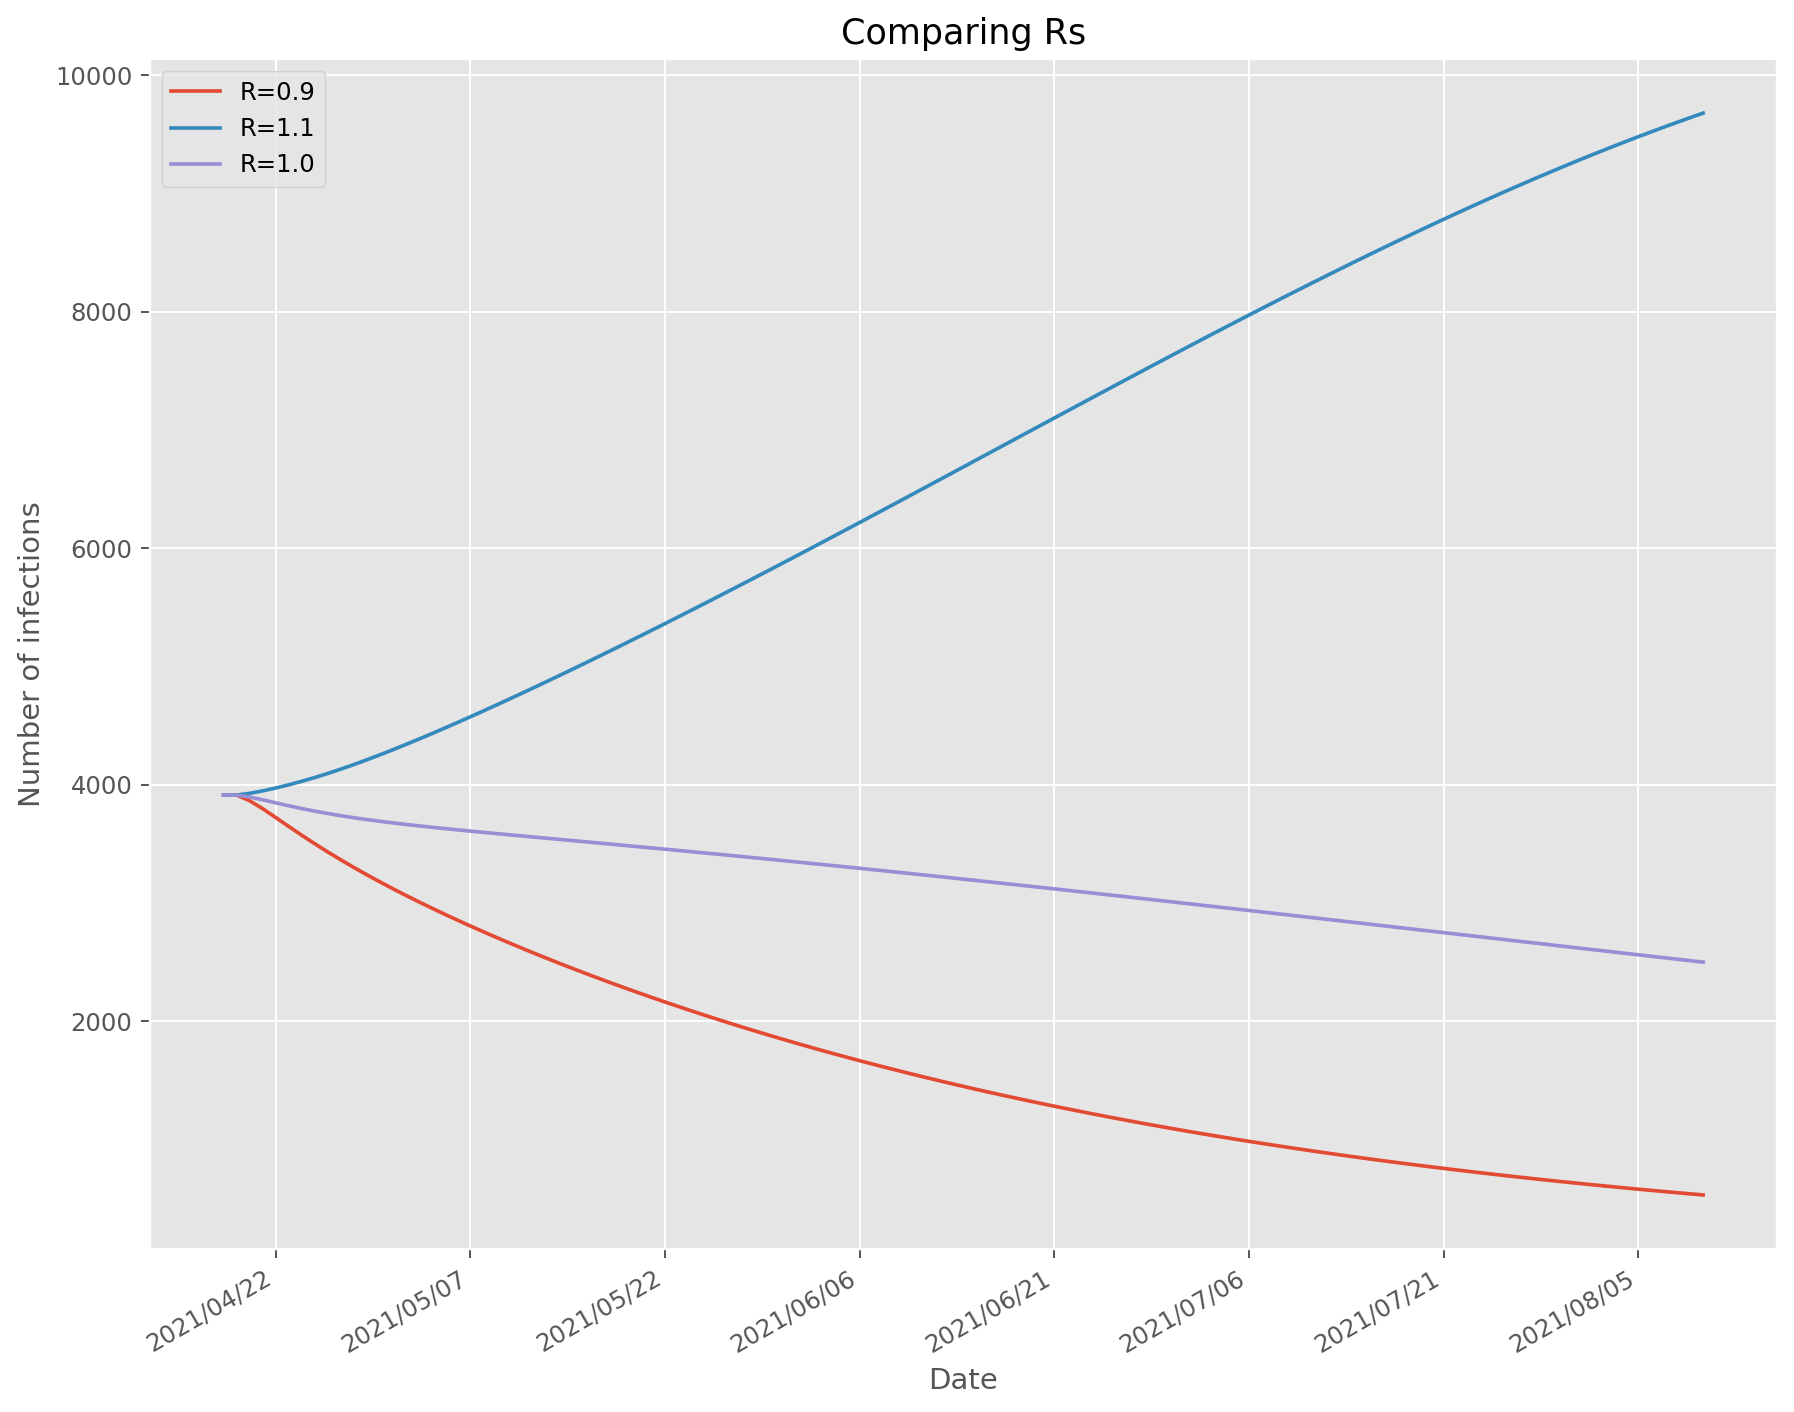

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = compare_rs_curves(ax, t0, T, r_infs)

fig.autofmt_xdate()

In [7]:
init_vacc = False
mob_av, beta_gh, pop_erva_hat, age_er, rho = get_model_parameters(num_age_groups, num_ervas, init_vacc, t0)
r_infs = get_infections_r_eff(rho, t0, T, init_vacc, mob_av, beta_gh, pop_erva_hat, age_er, 0.9, 1.1, 1.0)

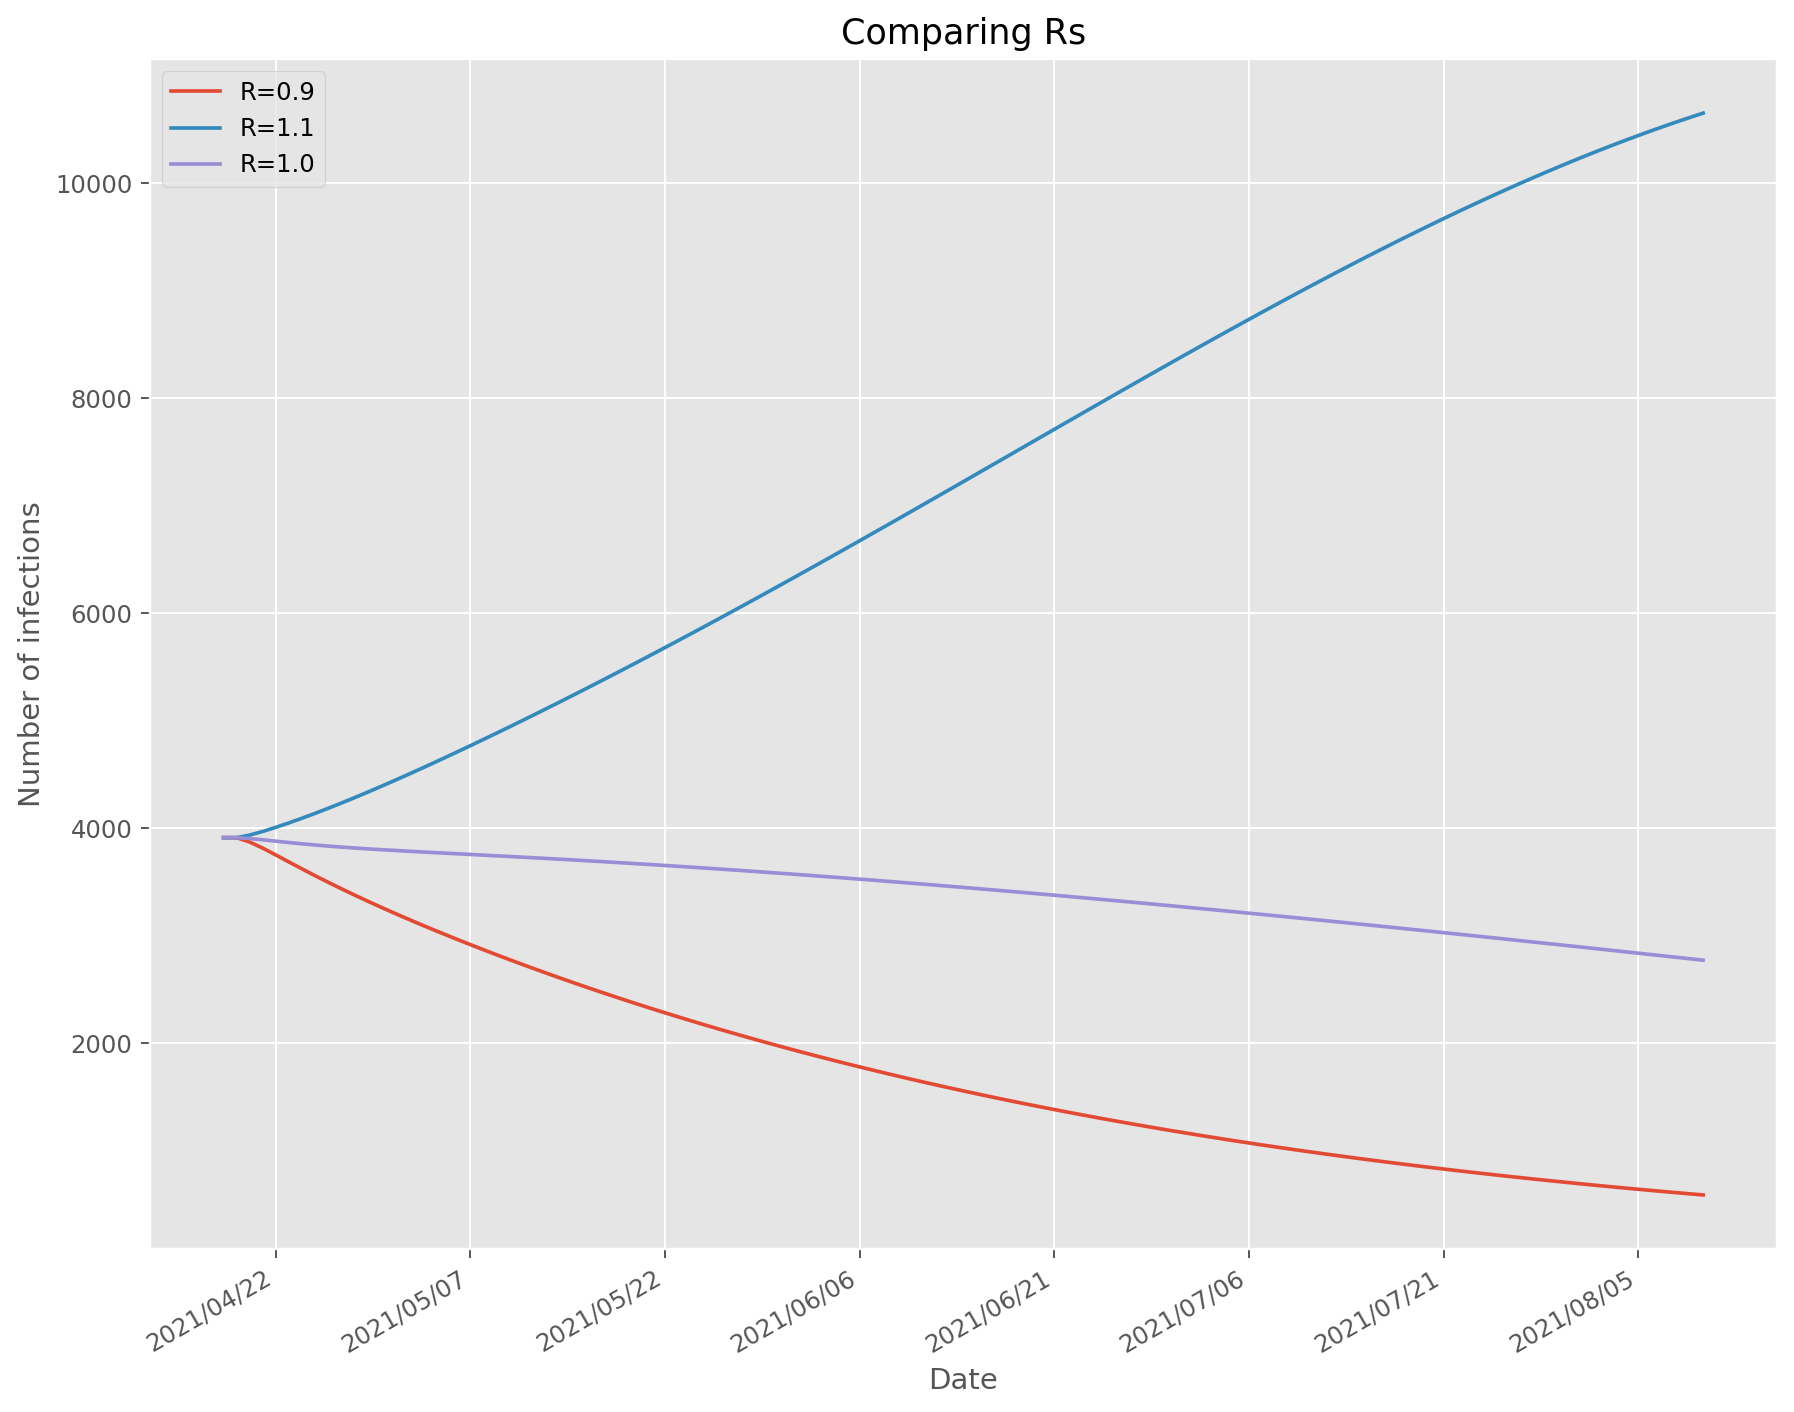

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = compare_rs_curves(ax, t0, T, r_infs)

fig.autofmt_xdate()